In [1]:
import os
import random
import numpy as np
import scipy.stats as st
from matplotlib import pyplot as plt


In [2]:


# Base_function:
# --------------
# Selects among three mathematical functions
# and creates the corresponding numpy array
#
# -> timepoints: numpy array with the timepoints (x-axis)
# -> id: identifier of the preferred math function
# <- numpy array with the y values, output of the selected math function

def base_function(timepoints, id):
    if id < 0 or id > 2:
        print("Wrong math function id input...")

    if id == 0: return np.sqrt(timepoints)
    if id == 1: return np.cos(2*3.14*timepoints)
    if id == 2: return np.log2(timepoints)

    return np.sqrt(timepoints)


# Rand_variation:
# ---------------
# Applies a random variation to the given curve
#
# -> curve: numpy array with the y values of the curve
# -> window: float number that corresponds to the desired variation
# <- curve: numpy array with the v values of the new curve

def rand_variation(curve, window):
    for i in range(len(curve)):
        w = random.uniform(-window, window)
        curve[i] += w

    return curve


# Generate_sample_metrics:
# ------------------------
# Construct the final numpy array containing all the experiments data
# according to the given number of timepoints, iterations and metrics
#
# -> args: dictionary with the number of timepoints, iterations and metrics
# <- mtrcs: The final numpy array with the simulated data

def generate_sample_metrics(args):
    num_of_timepoints = args["num_of_timepoints"]
    num_of_iters      = args["num_of_iterations"]
    num_of_metrics    = args["num_of_metrics"]

    mtrcs = np.zeros((num_of_timepoints, num_of_iters, num_of_metrics))
    timepoints = np.arange(num_of_timepoints) + 1

    for m in range(num_of_metrics):
        for i in range(num_of_iters):
            curve = base_function(timepoints, m)
            curve = rand_variation(curve, args["window"])
            mtrcs[:, i, m] = curve

    return mtrcs

In [5]:



# Compute_ci:
# -----------
# Computes the 95% confidence interval for the given
# numpy array containing the experimental data
#
# -> mtrcs: The numpy array with the experimental data
# -> args: dictionary with the tweaking parameters
# <- low: vector containing the lowest values
# <- med: vector containing the median values
# <- high: vector containing the highest values

def compute_ci(metrics, args):
    TPS  = args["num_of_timepoints"]
    low  = np.zeros((TPS))
    high = np.zeros((TPS))
    med  = np.zeros((TPS))

    for indx in range(TPS):
        m  = metrics[indx, :, args["metric_id"]]

        data = m
        temp = st.t.interval(confidence=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))
        low[indx]  = temp[0]
        high[indx] = temp[1]
        med[indx]  = (temp[0] + temp[1])/2

    return low, med, high


# Plot_metrics_ci:
# ----------------
# Plots the 95% confidence interval of the experimental data
#
# -> ci_elems: vectors of the lowest, median and highest values
# <- args: configuration parameters for the figure

def plot_metrics_ci(ci_elems, TPS, args):
    low  = ci_elems[0]
    med  = ci_elems[1]
    high = ci_elems[2]
    x = np.arange(TPS)+1

    fig, ax = plt.subplots()
    fig.set_size_inches(7, 5)
    line, = ax.plot(x, med, color = args["med_color"])
    ax.fill_between(x, low, high, color = args["var_color"], alpha=.1)
    plt.xlabel(args["xlabel"], fontsize = args["font_size"])
    plt.ylabel(args["ylabel"], fontsize = args["font_size"])
    plt.grid()
    plt.show()

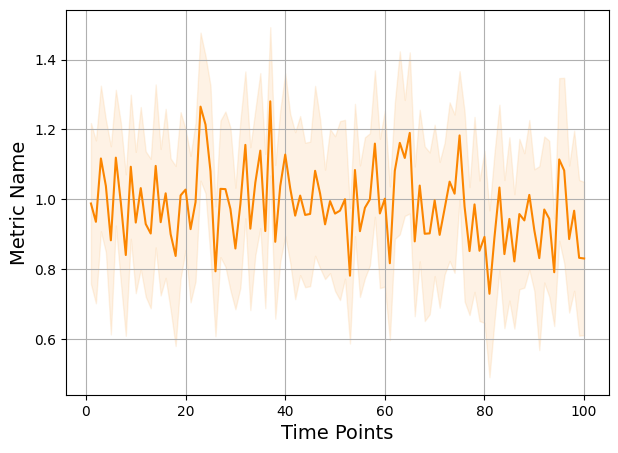

In [6]:

# Simulation configuration
gen_args = {
  "num_of_timepoints": 100, # The number of experiment x-axis points
  "num_of_iterations": 20,  # The number of experiment repetitions
  "num_of_metrics": 3,      # The number of experiment metrics
  "metric_id": 1,           # Metric id for the sample metrics
  "window": 0.8             # Variation number
}

# Figure configuration
fig_args = {
  "med_color": '#fb8500',
  "var_color": '#fb8500',
  "xlabel": 'Time Points',
  "ylabel": 'Metric Name',
  "font_size": 14
}

metrics = generate_sample_metrics(gen_args)
ci_elems = compute_ci(metrics, gen_args)
plot_metrics_ci(ci_elems, gen_args["num_of_timepoints"], fig_args)

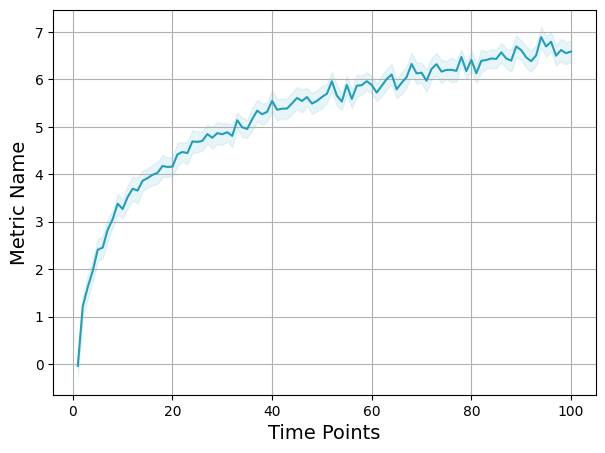

In [8]:
# Simulation configuration
gen_args = {
  "num_of_timepoints": 100, # The number of experiment x-axis points
  "num_of_iterations": 20,  # The number of experiment repetitions
  "num_of_metrics": 3,      # The number of experiment metrics
  "metric_id": 2,           # Metric id for the sample metrics
  "window": 0.8             # Variation number
}

# Figure configuration
fig_args = {
  "med_color": '#219ebc',
  "var_color": '#219ebc',
  "xlabel": 'Time Points',
  "ylabel": 'Metric Name',
  "font_size": 14
}

metrics = generate_sample_metrics(gen_args)
ci_elems = compute_ci(metrics, gen_args)
plot_metrics_ci(ci_elems, gen_args["num_of_timepoints"], fig_args)